In [1]:
#dependencies
import random
import numpy as np
import matplotlib.pyplot as plt

from palettable.colorbrewer.sequential import Reds_9, Blues_9, Purples_9
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
#read in the news site's text
text = ''
with open('Resources/_combined.txt', encoding='utf-8') as file:
    for line in file:
        text += line
        
#read in the extra stopwords
extra_stopwords = open('Resources/extra_stopwords.txt').read().split()


'''with open('Resources/extra_stopwords.txt') as f:
    for word in f:
        extra_stopwords += word
        print (word)'''


"with open('Resources/extra_stopwords.txt') as f:\n    for word in f:\n        extra_stopwords += word\n        print (word)"

In [3]:
#len(extra_stopwords)

In [4]:
'''for i in extra_stopwords:
    print(i)'''

'for i in extra_stopwords:\n    print(i)'

In [5]:
#set up stopwords
stopwords = set(STOPWORDS)

#add the extra stopwords
for word in extra_stopwords:
    stopwords.add(word)
    
#add special cases to stopwords
stopwords.update({'howard schultz', 'howard', 'schultz', 'sarah palin', 'sarah', 'palin', 'street washington', 'street', 'founder executive', 'founder', 'executive', 'capitol subsidiary', 'subsidiary', 'refresh', 'refresh refresh', 'tell refresh', 'daily wire', 'subsidiary new', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'november', 'december', 'hill', 'hill publishing', 'view', 'view discussion', 'discussion', 'inc', 'communications', 'communications inc', 'starbucks founder', 'publishing corp', 'publishing', 'corp', 'logged', 'sign', 'logged sign', 'refresh', 'please refresh', 'please', 'currently logged', 'currently', 'logged', 'october', 'october october', 'starbucks', 'starbucks founder', 'contents', 'site', 'contents site', 'howard schultz', 'cant', 'cant tell', 'digital network', 'post digital'})

In [6]:
'''print(stopwords)
print(len(stopwords))'''

'print(stopwords)\nprint(len(stopwords))'

In [7]:
#make the functions for the color palettes, leaving out the whitish colors
def blue_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Blues_9.colors[random.randint(2,8)])

def red_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_9.colors[random.randint(2,8)])

def purple_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Purples_9.colors[random.randint(2,8)])

In [8]:
#read in the mask
mask_png = 'usa2.png'
mask = np.array(Image.open(mask_png))

In [9]:
#set up the wordcloud
wc = WordCloud(background_color="white", width = 800, height = 400, max_words=4000, mask=mask, 
               color_func=purple_func, stopwords=stopwords, random_state=42)

In [10]:
# generate word cloud
wc.generate(text)
#wc.recolor(color_func=color_func, random_state=3)

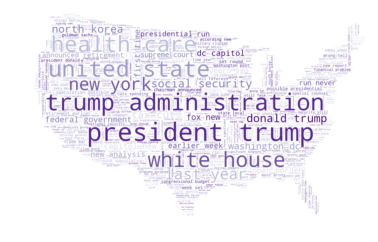

In [11]:
#plot
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
#export png
wc.to_file('img/AllCombined2.png')